In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import nltk # Natural Language Toolki
import re # Python Regular Expression 
from wordcloud import WordCloud 
# Data visualization technique used for representing text data in which the size of each word indicates its frequency or importance


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [ ]:
somoytv = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mehedi_somoyTV_Labeled.csv",prefix='col',header=None)
somoytv.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,https://www.somoynews.tv/news/2021-06-11/%E0%A...,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,শিক্ষা সময়,শিক্ষা,"১১ জুন, ২০২১",NaN,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,"ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষ...",0,0
1,https://www.somoynews.tv/news/2021-06-11/%E0%A...,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,আন্তর্জাতিক ডেস্ক,আন্তর্জাতিক,"১১ জুন, ২০২১",NaN,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,এ নিয়ে অঞ্চলটিতে গণতন্ত্রপন্থী কর্মীদের সক্রিয়...,0,0
2,https://www.somoynews.tv/news/2021-06-11/%E0%A...,যে শাস্তি হতে পারে সাকিবের,খেলার সময়,খেলা,"১১ জুন, ২০২১",NaN,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,ঢাকা প্রিমিয়ার লিগে (ডিপিএল) শুক্রবার (১১ জুন)...,0,0
3,https://www.somoynews.tv/news/2021-06-11/%E0%A...,বিয়ে করেছেন রেলমন্ত্রী সুজন,নাজমুস সালেহীন,বাংলাদেশ,"১১ জুন, ২০২১",NaN,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,শাম্মী আকতার একটি বেসরকারি প্রতিষ্ঠানে প্রশাসন...,1,0
4,https://www.somoynews.tv/news/2021-06-12/%E0%A...,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,শিক্ষা সময়,বাংলাদেশ,"১২ জুন, ২০২১",NaN,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,করোনাভাইরাস মহামারির মধ্যে দেশের মাধ্যমিক ও উচ...,0,0


In [ ]:
somoytv1 = somoytv[['col1','col6','col7','col9']].rename(columns={'col1':'title',
                                                          'col6':'headline',
                                                          'col7':'content',
                                                          'col9':'label'})
somoytv1.head()

,title,headline,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,"ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষ...",0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,এ নিয়ে অঞ্চলটিতে গণতন্ত্রপন্থী কর্মীদের সক্রিয়...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,ঢাকা প্রিমিয়ার লিগে (ডিপিএল) শুক্রবার (১১ জুন)...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,শাম্মী আকতার একটি বেসরকারি প্রতিষ্ঠানে প্রশাসন...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,করোনাভাইরাস মহামারির মধ্যে দেশের মাধ্যমিক ও উচ...,0


In [ ]:
somoytv1['content'] = somoytv1['headline']+somoytv1['content']

In [ ]:
somoytv1.loc[0,'content']

"রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপাচার্য অধ্যাপক আবদুস সোবহান গত ৬ মে যে ১১ জন শিক্ষককে অবৈধভাবে নিয়োগ দিয়েছেন, তাদের অনেকেরই বিশ্ববিদ্যালয়ের শিক্ষক হওয়ার মতো ন্যূনতম যোগ্যতা নেই। সেই ১১ জন শিক্ষকের মধ্যে বিশ্ববিদ্যালয়টির প্রকৌশল অনুষদভুক্ত ইনফরমেশন অ্যান্ড কমিউনিকেশন ইঞ্জিনিয়ারিং বিভাগে নিয়োগ পেয়েছেন ইন্দ্রনীল মিশ্র। সম্প্রতি সেই প্রার্থীর অনার্স পরীক্ষার ফলাফল গণমাধ্যমের কাছে এসেছে।ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষায় প্রথম শ্রেণি অর্জন করতে পারেননি। বরং দ্বিতীয় শ্রেণি পেয়ে যে ১৪ জন শিক্ষার্থী উত্তীর্ণ হয়েছে, তার মধ্যে ইন্দ্রনীল মিশ্র মেধাক্রম অনুযায়ী রয়েছেন দশম স্থানে। শুধু তাই নয়, তিনিই একমাত্র ছাত্র যিনি অনার্স এর কোর্স-৪০৩ এ ফেল করেছিলেন।এমন একজন ছাত্রকে বিভাগে শিক্ষক হিসেবে নিয়োগ দেওয়ায় বিস্ময় প্রকাশ করছেন স্বয়ং বিভাগের সভাপতি অধ্যাপক এমদাদুল হক। তিনি বলেন, বিভাগে নিয়োগের জন্য সার্কুলার দেওয়া হয়েছিল। কিন্তু সেই সার্কুলার ভিত্তিতে মৌখিক পরীক্ষা না নিয়েই একজন প্রার্থীকে শিক্ষক হিসেবে নিয়োগ দেওয়া হয়েছে। আবার এমন একজনকে নিয়োগ দেওয়া হলো যে কোনোভাবেই শিক্ষক পদে

In [ ]:
somoytv1.drop(labels='headline',axis=1,inplace=True)

In [ ]:
somoytv1.head()

,title,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,0


In [ ]:
somoytv1 = somoytv1[somoytv1.title!=0]

In [ ]:
import collections
collections.Counter(somoytv1['label'])

Counter({0: 415, 1: 21})

In [ ]:
somoytv1[somoytv1['label']==-1]=0

In [ ]:
collections.Counter(somoytv1['label'])

Counter({0: 415, 1: 21})

In [ ]:
collections.Counter(all_combined['label'])

Counter({0: 52077, 1: 987})

In [ ]:
somoytv1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
banfake = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_BanFake_Labelled - Mahtab_BanFake_Labelled.csv",prefix='col',
                      skiprows=1,header=None)
banfake.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire,Clickbaits,NaN
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire,Satire,NaN
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire,Satire,NaN
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire,Clickbaits,NaN
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire,Clickbaits,NaN


In [ ]:
banfake1 = banfake[['col6','col7','col10']].rename(columns={'col6':'title',
                                                   'col7':'content',
                                                   'col10':'label'})
banfake1.head()

,title,content,label
0,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",Clickbaits
1,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",Satire
2,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,Satire
3,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,Clickbaits
4,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",Clickbaits


In [ ]:
banfake1['label'].unique()

array(['Clickbaits', 'Satire', 'Fake'], dtype=object)

In [ ]:
banfake1['label']=banfake1['label'].map({'Clickbaits':1,"Satire":0,"Fake":0})

In [ ]:
import collections
collections.Counter(banfake1['label'])

Counter({0: 914, 1: 262})

In [ ]:
banfake1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
newcitizen=pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_Newcitizen_Labelled(Recheck) - Mahtab_Newcitizen_Labelled.csv").iloc[:,1:]
newcitizen.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,Label
0,https://newzcitizen.com/archives/28969,বাসাভাড়া নিতে বাড়িওয়ালাকে নকল স্বামী দেখালেন প...,NaN,NaN,"June 24, 2021",NaN,NaN,ঢাকায় একজন ব্যাচেলর মেয়ের সমস্যার শেষ নেই। বাস...,1,1,Clickbaits
1,https://newzcitizen.com/archives/28966,মাত্র ৫৫ টাকার বিনিয়োগে মিলবে ৩৬ হাজার! সরকারি...,NaN,NaN,"June 24, 2021",NaN,NaN,সকলেই ভবিষ্যতের জন্য বিনিয়োগ করতে চান। প্রয়োজন...,1,1,Clickbaits
2,https://newzcitizen.com/archives/28961,ভিক্ষুকের কোলের বাচ্চাটি সবসময় ঘুমিয়ে থাকার র’...,NaN,NaN,"June 24, 2021",NaN,NaN,চলার পথে বা জ্যামে গাড়িতে বসে থাকার সময় অনেক ধ...,1,1,Clickbaits
3,https://newzcitizen.com/archives/28958,নানা রহস্যে ভরপুর পরীমনির গাড়ি!,NaN,NaN,"June 24, 2021",NaN,NaN,রুপালি পর্দার আলোচিত এক অভিনেত্রী। চলচ্চিত্র ছ...,1,NaN,Clickbaits
4,https://newzcitizen.com/archives/28953,"যেভাবে একদিনে তৈরি হয় ১০ তলা বিলাসবহুল বাড়ি, দ...",NaN,NaN,"June 24, 2021",NaN,NaN,চীনের সামগ্রীর এত জনপ্রিয়তা কেন?? এর প্রথম কা...,1,NaN,Clickbaits


In [ ]:
newcitizen1 = newcitizen[['col_1','col_7','Label']].rename(columns={'col_1':'title',
                                                   'col_7':'content',
                                                   'Label':'label'})
newcitizen1.head()

,title,content,label
0,বাসাভাড়া নিতে বাড়িওয়ালাকে নকল স্বামী দেখালেন প...,ঢাকায় একজন ব্যাচেলর মেয়ের সমস্যার শেষ নেই। বাস...,Clickbaits
1,মাত্র ৫৫ টাকার বিনিয়োগে মিলবে ৩৬ হাজার! সরকারি...,সকলেই ভবিষ্যতের জন্য বিনিয়োগ করতে চান। প্রয়োজন...,Clickbaits
2,ভিক্ষুকের কোলের বাচ্চাটি সবসময় ঘুমিয়ে থাকার র’...,চলার পথে বা জ্যামে গাড়িতে বসে থাকার সময় অনেক ধ...,Clickbaits
3,নানা রহস্যে ভরপুর পরীমনির গাড়ি!,রুপালি পর্দার আলোচিত এক অভিনেত্রী। চলচ্চিত্র ছ...,Clickbaits
4,"যেভাবে একদিনে তৈরি হয় ১০ তলা বিলাসবহুল বাড়ি, দ...",চীনের সামগ্রীর এত জনপ্রিয়তা কেন?? এর প্রথম কা...,Clickbaits


In [ ]:
newcitizen1['label'].unique()

array(['Clickbaits', nan], dtype=object)

In [ ]:
collections.Counter(newcitizen1['label'])

Counter({'Clickbaits': 308, nan: 677})

In [ ]:
newcitizen1['label'] = newcitizen1['label'].map({'Clickbaits':1}).fillna(0).astype('int')

In [ ]:
collections.Counter(newcitizen1['label'])

Counter({0: 677, 1: 308})

In [ ]:
newcitizen1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
rtv=pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_rtv_labelled - Mahtab_rtv_labelled.csv").iloc[:,1:]
rtv.head()

,col_0,title,col_2,col_3,col_4,col_5,col_6,content,col_8,label
0,https://www.rtvonline.com/bangladesh/134786/%E...,নাসিরসহ আসামিরা আদালতে,আরটিভি নিউজ,বাংলাদেশ,১৫ জুন ২০২১,নাসিরসহ আসামিরা আদালতে,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,2,NaN
1,https://www.rtvonline.com/bangladesh/134785/%E...,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,আরটিভি নিউজ,বাংলাদেশ,১৫ জুন ২০২১,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভিয...,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভি...,2,NaN
2,https://www.rtvonline.com/country/134784/%E0%A...,ব্যাংকের টাকা লুট করতে সুড়ঙ্গ তৈরি,আরটিভি নিউজ,দেশজুড়ে,১৫ জুন ২০২১,"ব্যাংকের, টাকা, লুট, করতে, সুড়ঙ্গ, তৈরি, rtv o...",রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গীর...,রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গী...,2,NaN
3,https://www.rtvonline.com/international/134783...,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,"আন্তর্জাতিক ডেস্ক, আরটিভি নিউজ",আন্তর্জাতিক,১৫ জুন ২০২১,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছে...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছ...,2,NaN
4,https://www.rtvonline.com/country/134782/%E0%A...,ইয়াবাসহ গ্রেপ্তার দুধ জসিম,"চট্টগ্রাম প্রতিনিধি, আরটিভি নিউজ",দেশজুড়ে,১৫ জুন ২০২১,"ইয়াবাসহ, গ্রেপ্তার, দুধ, জসিম",চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্তা...,চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্ত...,2,NaN


In [ ]:
rtv1 = rtv[['title','content','label']]
rtv1.head()

,title,content,label
0,নাসিরসহ আসামিরা আদালতে,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,NaN
1,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভি...,NaN
2,ব্যাংকের টাকা লুট করতে সুড়ঙ্গ তৈরি,রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গী...,NaN
3,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছ...,NaN
4,ইয়াবাসহ গ্রেপ্তার দুধ জসিম,চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্ত...,NaN


In [ ]:
collections.Counter(rtv1['label'])

Counter({'-1': 5, 'Clickbaits': 84, nan: 1000})

In [ ]:
rtv1['label'] = rtv1['label'].map({'-1':0,'Clickbaits':1}).fillna(0).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
collections.Counter(rtv1['label'])

Counter({0: 1005, 1: 84})

In [ ]:
rtv1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
topdhaka = pd.read_csv('/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/topdhaka_final - topdhaka_final.csv').iloc[:,1:]
topdhaka.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,Clickabait
0,https://topdhaka.com/%e0%a6%aa%e0%a7%81%e0%a6%...,পু’রুষের শ’ক্তি বা’ড়ানোর ৪টি ঔ’ষধি খা’বার।,NaN,NaN,2021-07-19,NaN,NaN,বর্তমান যুগে বেশিরভাগ পুরুষই যৌ’ন সমস্যায় ভোগ...,1,1.0
1,https://topdhaka.com/%e0%a6%ac%e0%a6%bf%e0%a6%...,বি’বাহিত না’রীরা যে ৫ টি কারণে প’রকীয়া করে,NaN,NaN,2021-07-19,NaN,NaN,প’রকীয়া যেন আমাদের দৈনন্দিন জীবনের সাথে চলে আ...,1,1.0
2,https://topdhaka.com/%e0%a6%aa%e0%a7%8d%e0%a6%...,প্রবাসীরা দেশে আসলেই বাসায় ডাকতেন নায়িকা রোমানা,NaN,NaN,2021-07-19,NaN,NaN,সৌদি আরব প্রবাসী কামরুল ই’সলাম জুয়েলের দা’য়ের ...,1,NaN
3,https://topdhaka.com/%e0%a6%aa%e0%a7%8d%e0%a6%...,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল’নের আমাকে ...,NaN,NaN,2021-07-18,NaN,NaN,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল;নের আমাকে ...,1,1.0
4,https://topdhaka.com/%e0%a6%9f%e0%a6%be%e0%a6%...,"টানা ২ ঘন্টা ক’রে দেখিয়েছি, আমিও পারি : সালমা",NaN,NaN,2021-07-19,NaN,NaN,সম্প্রতি লালমাটিয়ায় সংগীত পরিচালক রেজওয়ান শেখে...,1,1.0


In [ ]:
topdhaka1 = topdhaka[['col_1','col_7','Clickabait']].rename(columns=
                                                         {'col_1':'title','col_7':'content','Clickabait':'label'})

In [ ]:
topdhaka1.head()

,title,content,label
0,পু’রুষের শ’ক্তি বা’ড়ানোর ৪টি ঔ’ষধি খা’বার।,বর্তমান যুগে বেশিরভাগ পুরুষই যৌ’ন সমস্যায় ভোগ...,1.0
1,বি’বাহিত না’রীরা যে ৫ টি কারণে প’রকীয়া করে,প’রকীয়া যেন আমাদের দৈনন্দিন জীবনের সাথে চলে আ...,1.0
2,প্রবাসীরা দেশে আসলেই বাসায় ডাকতেন নায়িকা রোমানা,সৌদি আরব প্রবাসী কামরুল ই’সলাম জুয়েলের দা’য়ের ...,NaN
3,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল’নের আমাকে ...,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল;নের আমাকে ...,1.0
4,"টানা ২ ঘন্টা ক’রে দেখিয়েছি, আমিও পারি : সালমা",সম্প্রতি লালমাটিয়ায় সংগীত পরিচালক রেজওয়ান শেখে...,1.0


In [ ]:
topdhaka1[topdhaka1['label']==1].iloc[-1,:]

title       যে ১০ পেশার পুরুষের প্রতি নারীদের দু’র্বলতা বেশি
content    নারীদের প্রতি পুরুষের যেমন আক’র্ষণ রয়েছে তেমনি...
label                                                      1
Name: 699, dtype: object

In [ ]:
topdhaka1=topdhaka1.iloc[:700,:]

In [ ]:
topdhaka1.shape

(700, 3)

In [ ]:
collections.Counter(topdhaka1['label'])

In [ ]:
topdhaka1.label= topdhaka1.label.apply(lambda x:0 if x==-1 else x).fillna(0).astype('int')

In [ ]:
import collections
collections.Counter(topdhaka1['label'])

Counter({0: 388, 1: 312})

In [ ]:
banfake_authentic = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Authentic-48K.csv/Authentic-48K.csv")
banfake_authentic.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
banfake_authentic1 = banfake_authentic[['headline','content','label']].rename(columns={'headline':'title'})
banfake_authentic1.label = 0

In [ ]:
all_combined = pd.concat([somoytv1,banfake1,newcitizen1,rtv1,topdhaka1,banfake_authentic1[len(banfake_authentic1.title)//2:]])
all_combined = all_combined[all_combined.title!=0]

In [ ]:
all_combined.describe(include='all')

,title,content,label
count,28725,28725.0,28725.000000
unique,27277,28697.0,NaN
top,সিরাজগঞ্জে যুবলীগ নেতাকে কুপিয়ে হত্যা,0.0,NaN
freq,15,2.0,NaN
mean,NaN,NaN,0.034360
std,NaN,NaN,0.182156
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,0.000000


In [ ]:
all_combined.head()

,title,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,0


In [ ]:
collections.Counter(all_combined['label'])

Counter({0: 27738, 1: 987})

In [ ]:
!pip install gensim==4.0.0

     |████████████████████████████████| 23.9 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim
gensim.__version__

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


'4.0.0'

# word-embedding (pre-trained + self-trained)

## word2vec

In [ ]:
from gensim.models import KeyedVectors
wv_bangla = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/machine_learning/bnwiki_word2vec.vector")

In [ ]:
wv_bangla.index_to_key[:5]

['।', ',', 'এবং', 'ও', 'হয়']

## fasttext

In [ ]:
from gensim.models.fasttext import load_facebook_model
ft_bangla =load_facebook_model("/content/drive/MyDrive/machine_learning/bengali_fasttext_wiki.bin",
                                              encoding='utf-8')

In [ ]:
ft_wv=ft_bangla.wv
del ft_bangla

In [ ]:
ft_wv.index_to_key

['</s>',
 'এবং',
 'ও',
 'তিনি',
 'একটি',
 'এই',
 'তার',
 'হয়।',
 'থেকে',
 'করা',
 'সালে',
 'করে',
 'এর',
 'করেন।',
 'জন্য',
 'মধ্যে',
 'করে।',
 'হিসেবে',
 'সালের',
 'বা',
 'হয়',
 'সাথে',
 'এ',
 'হয়ে',
 'এটি',
 'প্রথম',
 'যা',
 'ছিল',
 'তাদের',
 'করতে',
 'একজন',
 'করেন',
 'যে',
 'এক',
 'পর',
 'করার',
 'নিয়ে',
 'হল',
 'শুরু',
 'বছর',
 'সময়',
 'বিভিন্ন',
 'পর্যন্ত',
 'যায়।',
 'তাকে',
 'হন।',
 '।',
 'কিছু',
 'কিন্তু',
 'তারা',
 'ছিলেন',
 'ভারতের',
 'নাম',
 'ছিলেন।',
 'ছিল।',
 'দিয়ে',
 'দ্বারা',
 'প্রধান',
 'হতে',
 'প্রায়',
 'ব্যবহার',
 'জাতীয়',
 'কাজ',
 'নামে',
 'লাভ',
 'মাধ্যমে',
 'জেলার',
 'হয়েছে।',
 'কোন',
 'থাকে।',
 'অনেক',
 'রয়েছে।',
 '()',
 'দলের',
 'বলে',
 'তবে',
 'বাংলাদেশের',
 'যার',
 'অংশ',
 'উপর',
 'না',
 'অন্যান্য',
 ',',
 'হিসাবে',
 'দেখা',
 'হার',
 '-',
 'জন',
 'পরে',
 'ক্রিকেট',
 'হয়,',
 'যায়',
 'দক্ষিণ',
 'দ্বিতীয়',
 'আর',
 'দিকে',
 'তা',
 'চলচ্চিত্র',
 'ফলে',
 'হয়েছিল।',
 'অভিনয়',
 'সঙ্গে',
 'দুই',
 'না।',
 'ভারতীয়',
 'আন্তর্জাতিক',
 'বাংলাদেশ',
 'তৈরি',
 

## Glove

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
glove_file = '/content/drive/MyDrive/machine_learning/bn_glove.39M.300d.txt'
tmp_file = get_tmpfile('/content/drive/MyDrive/machine_learning/bn_glove_w2vec.39M.300d.txt')
_ = glove2word2vec(glove_file, tmp_file)
gv_bangla = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
!pip install bnlp-toolkit

     |████████████████████████████████| 1.2 MB 14.1 MB/s 
     |████████████████████████████████| 23.9 MB 1.5 MB/s 
     |████████████████████████████████| 743 kB 37.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.0
    Uninstalling gensim-4.0.0:
      Successfully uninstalled gensim-4.0.0


In [ ]:
from bnlp import BasicTokenizer
basic_tokenizer = BasicTokenizer()

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## self trained we

In [ ]:
from gensim.models import Word2Vec
def train_word_emb(tokens):
  num_features = 300
  min_word_count = 3
  num_workers = 2
  window_size = 6
  subsampling = 1e-3
  model = Word2Vec(
          tokens,
          workers=num_workers,
          vector_size=num_features,
          min_count=min_word_count,
          window=window_size,
          sample=subsampling)
  
  word_embed= model.wv
  del model
  return word_embed

In [ ]:
st_wv = train_word_emb(banfake_authentic1[:len(banfake_authentic1.title)//2]\
                       .title.apply(lambda x: basic_tokenizer.tokenize(str(x))).values)

In [ ]:
st_wv.index_to_key[:5]

[':', ',', '’', '-', '‘']

In [ ]:
#@title
# Calculate the Review of each of the Review
import collections
temp = all_combined['content'].apply(lambda x: len(basic_tokenizer.tokenize(str(x))))

In [ ]:
#@title
# Average word in train and test content
train_word_average = np.mean(X_train['content'].apply(lambda x: len(str(x).split())))
test_word_average = np.mean(X_test['content'].apply(lambda x: len(str(x).split())))
print("Average word in train is {} Average word in test is {}".format(train_word_average, test_word_average))

# Minimum word in train and test content 
train_word_minimum = np.min(X_train['content'].apply(lambda x: len(str(x).split())))
test_word_minimum = np.min(X_test['content'].apply(lambda x: len(str(x).split())))
print("Minimum word in train is {} Minimum word in test is {}".format(train_word_minimum, test_word_minimum))


# Maximum word in train and test content
train_word_maximum = np.max(X_train['content'].apply(lambda x: len(str(x).split())))
test_word_maximum = np.max(X_test['content'].apply(lambda x: len(str(x).split())))
print("Maximum word in train is {} Maximum word in test is {}".format(train_word_maximum, test_word_maximum))


Average word in train is 277.79602990137573 Average word in test is 270.2183908045977
Minimum word in train is 0 Minimum word in test is 8
Maximum word in train is 4788 Maximum word in test is 2754


In [ ]:
from bnlp.corpus import stopwords

# Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

# cleanup

In [ ]:
from bnlp.corpus import stopwords, punctuations,digits
import re
digits+='123456789'
def clean_up(df,stopword=False,punc=False,digit=False,remove_url=True):
  s =df.copy()
  if stopword:
    for i,values in enumerate(s):
      v = ' '.join([x for x in values.split() if x not in stopwords])
      s.iloc[i]=v
    
  if punc:
    s = s.apply(lambda x: re.sub('['+punctuations+']','',x))
  if digit:
    s = s.apply(lambda x: re.sub('['+digits+']','',x))
  if remove_url:
    url = re.compile('https?://\S+|www\.\S+')
    s=s.apply(lambda x:url.sub(r'',x))

  s = s.apply(lambda x:re.sub('\n', ' ',x))
  s = s.apply(lambda x:re.sub('\t', ' ',x))
  s = s.apply(lambda x:re.sub(r'\\', '',x))
  s = s.apply(lambda x:re.sub(' +', ' ',x))
  s = s.apply(lambda x:re.sub('|', '',x))
  s = s.apply(lambda x:re.sub('’', ' ',x))
  s = s.apply(lambda x:re.sub('‘', ' ',x))
  return pd.DataFrame(s)

In [ ]:
#cleaning data
X = clean_up(all_combined.title,stopword=True,punc=True,digit=True,remove_url=True)

In [ ]:
X['label'] = all_combined.loc[all_combined.title!=0,'label'].values

In [ ]:
X.shape

(28723, 2)

In [ ]:
X.head()

,title,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা রাবিতে নিয়োগ পাওয়া ই...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,0
2,শাস্তি সাকিবের,0
3,বিয়ে রেলমন্ত্রী সুজন,0
4,বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,0


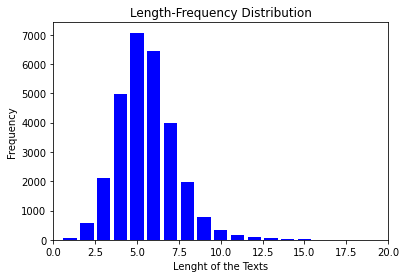

Maximum Length of a review: 27
Minimum Length of a review: 0
Average Length of a reviews: 12.0


In [ ]:
# Calculate the Review of each of the Review
import collections
frequency = collections.Counter(X.title.apply(lambda x: len(basic_tokenizer.tokenize(str(x)))))

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(0, 20)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(frequency.keys())}")
print(f"Minimum Length of a review: {min(frequency.keys())}")
print(f"Average Length of a reviews: {round(np.mean(list(frequency.keys())),0)}")

# create features

In [ ]:
df = X.title.iloc[:100].copy()
vocab=wv_bangla.index_to_key
for i,values in enumerate(df):
  v =[wv_bangla[x] for x in values.split() if x in vocab]
  df.iloc[i]=v
df= df.apply(lambda x:np.mean(x,axis=0) if len(x)!=0 else [0]*wv_bangla.vector_size)

In [ ]:
df.shape

(100,)

In [ ]:
pd.DataFrame(df.values.tolist()).values.shape

(100, 100)

In [ ]:
v = set([len(s) for s in df.values])
v

{100}

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df,X.label.iloc[:100].values,test_size=0.1)

In [ ]:
import os
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import sparse
import string
import pickle
         
def word_emb(X,word_embed=wv_bangla):
    print('I am in word_emb')
    vocab=word_embed.index_to_key
    # print("Vocab Size =>%s" %(len(vocab)))
    df = X.title.copy()
        
    for i,values in enumerate(df):
      v =[word_embed[x] for x in values.split() if x in vocab]
      df.iloc[i]=v
    df= df.apply(lambda x:np.mean(x,axis=0) if len(x)!=0 else [0]*word_embed.vector_size)
    # tokentovaluelist = [vector[token] for token in tokens if token in vocab]
    return pd.DataFrame(df.values.tolist()).values,X.label.values

    # featureVector = []
    # labels = []
    # for row in df.iterrows():
    #     row = row[1]
    #     # id = row["articleID"]
    #     mean = doc2MeanValue(row["content"])
    #     if mean.size == 0:
    #         mean = [0] * size
    #         featureVector.append(mean)
    #         continue
    #     mean = np.mean(mean, axis=0)
    #     label = row["label"]
    #     mean = (mean.tolist())
    #     labels.append(label)
    #     featureVector.append(mean)

    # df = pd.DataFrame(featureVector)
    # df = df.fillna(0)
    # return sparse.csr.csr_matrix(df.values)


def tfidf_charF(X, a, b,save_model=False):


    # X = X.title
    tfidf_char = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(a, b),
                                 decode_error='replace', encoding='utf-8', analyzer='char')

    tfidf_char.fit(X.title.values.astype('U'))
#     if save_model:
#         name = "tfidf_char.pkl"
#         path = config.API+name
#         outfile = open(path, 'wb')
#         pickle.dump(tfidf_char, outfile)
#         outfile.close()
    x_char = tfidf_char.transform(X.title.values.astype('U'))
    return x_char,X.label.values


def tfidf_wordF(X, a, b,save_model=False):

    # X = X.content
    tfidf_word = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(a, b),
                                 decode_error='replace',
                                 encoding='utf-8', analyzer='word', tokenizer=BasicTokenizer().tokenize)
    
    tfidf_word.fit(X.title.values.astype('U'))

#     if save_model:
#         name = "tfidf_word.pkl"
#         path = config.API+name
#         outfile = open(path, 'wb')
#         pickle.dump(tfidf_char, outfile)
#         outfile.close()
    
    x_word = tfidf_word.transform(X.title.values.astype('U'))
    return x_word,X.label.values


# def mp(X):

#     def count_punc(content):
#         char_list = list(content)
#         count = 0
#         for c in char_list:
#             if c == '!':
#                 count += 1
#         return count

    # def load_rank():
    #     rank = {}
    #     mx = 0
    #     na = []
    #     paths = os.listdir(config.ALEXA_RANK)
    #     for path in paths:
    #         d = pd.read_csv(config.ALEXA_RANK+"/"+path)
    #         # d = d.drop(['Unnamed: 0'], axis=1)
    #         d = d.fillna(0)
    #         # print(d[d['rank'].isnull()])
    #         for row in d.iterrows():
    #             row = row[1]
    #             if row['rank'] == 0:
    #                 na.append(row['domain'])
    #             else:
    #                 rank[row['domain']] = int(row['rank'])
    #                 mx = max(int(row['rank']), mx)
    #     for n in na:
    #         rank[n] = mx
    #     return rank

    # ranks = load_rank()
    # df = X
    # featureVector = []
    # for row in df.iterrows():
    #     row = row[1]
    #     feature = []
    #     feature.append(count_punc(row['content']))
    #     r = ranks[row['domain']]
    #     feature.append(r)
    #     featureVector.append(feature)

    # dfMP = pd.DataFrame(featureVector)
    # normalized_df = (dfMP - dfMP.mean()) / dfMP.std()
    # dfMP = normalized_df.fillna(0)
    # return sparse.csr.csr_matrix(dfMP.values)


# def pos():
#     path_pos = config.POS_PATH
#     dfPOS = pd.read_csv(path_pos)
#     dfPOS = dfPOS.fillna(0)
#     dfPOS = dfPOS.drop(['articleID', 'Unnamed: 0'], axis=1)
#     X_POS = sparse.csr.csr_matrix(dfPOS.values)
#     return X_POS

# call model

In [ ]:
# def mp(args):

#     model(load_feature.mp(X),Y,"MP")


# def pos(args):

#     model(load_feature.pos(),Y,"POS")



#Unigram
def unigram(X,*args):
    feature_space,label = tfidf_wordF(X, 1, 1)
    # print(cv)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Unigram")
    # else:
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    return dataset_split(feature_space.toarray(),label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Unigram")


#Bigram
def bigram(X,*args):
    feature_space,label = tfidf_wordF(X, 2, 2)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Bigram")
    # else:
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    return dataset_split(feature_space.toarray(),label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Bigram")
    
#Trigram
def trigram(X,*args):
    feature_space,label = tfidf_wordF(X, 3, 3)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Trigram")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    
    # return model(ml_model,X_train,X_test,y_train,y_test,"Trigram")


#U+B+T
def u_b_t(X,*args):
    feature_space,label = tfidf_wordF(X, 1, 3)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"U+B+T")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"U+B+T")
    


#C3
def char_3(X,*args):
    feature_space,label = tfidf_charF(X, 3, 3)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"C3-gram")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"C3-gram")
    
    

def char_4(X,*args):
    feature_space,label = tfidf_charF(X, 4, 4)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"C4-gram")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"C4-gram")
    
    

def char_5(X,*args):
    feature_space,label = tfidf_charF(X, 5, 5)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"C5-gram")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"C5-gram")
    
    

def char_3_4_5(X,*args):
    feature_space,label = tfidf_charF(X, 3, 5)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"C3+C4+C5")
    # else:
    return dataset_split(feature_space.toarray(),label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"C3+C4+C5")
    
    


#Linguistic
def lexical(X,*args):

    X_char,label = tfidf_charF(X, 3, 5)
    X_word,label = tfidf_wordF(X, 1, 3)
    feature_space= np.concatenate([X_word.toarray(),X_char.toarray()],axis=1)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Lexical")
    # else:
    return dataset_split(feature_space,label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Lexical")


#Word Embedding Fasttext
def word_300(X,*args):
    feature_space,label = word_emb(X,word_embed=ft_wv)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Emb_F")
    # else:
    return dataset_split(feature_space,label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Emb_F")


#Word Embedding News
def word_100(X,*args):
    feature_space,label = word_emb(X)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Emb_N")
    # else:
    return dataset_split(feature_space,label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Emb_N")
    

def word_self_trained(X,*args):
    feature_space,label = word_emb(X,word_embed=st_wv)
    # if cv:
    #   for X_train,X_test,y_train,y_test in dataset_split(feature_space,label,cv):
    #      yield model(ml_model,X_train,X_test,y_train,y_test,"Emb_ST")
    # else:
    return dataset_split(feature_space,label,cv)
    # X_train,X_test,y_train,y_test = dataset_split(feature_space,label,cv)
    # return model(ml_model,X_train,X_test,y_train,y_test,"Emb_ST")

#L+POS
# def L_POS(args):

#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos())),Y,"L+POS")


# #L+POS+Emb(F)
# def L_POS_Emb_F(args):
    

#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos(), load_feature.word_emb(300,X))),Y,"L+POS+Emb(F)")

# #L+POS+Emb(N)
# def L_POS_Emb_N(args):
    
#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos(), load_feature.word_emb(100,X))),Y,"L+POS+Emb(N)")


# #L+POS+E(F)+MP
# def L_POS_Emb_F_MP(args):
    
#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos(), load_feature.word_emb(300,X), load_feature.mp(X))),Y,"L+POS+E(F)+MP")


# #L+POS+E(N)+MP
# def L_POS_Emb_N_MP(args):

#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos(), load_feature.word_emb(100,X), load_feature.mp(X))),Y,"L+POS+E(N)+MP")


# #Allfeatures
# def allfeatures(args):

#     model(sparse.hstack((load_feature.tfidf_charF(X, 3, 5), load_feature.tfidf_wordF(X, 1, 3), load_feature.pos(), load_feature.word_emb(300,X), load_feature.word_emb(100,X), load_feature.mp(X))),Y,"Allfeatures")


In [ ]:
def dataset_split(feature_space,label,cv=False):
    # if cv:
    #   skf = StratifiedKFold(n_splits=10)
    #   for train_idx,test_idx in skf.split(feature_space,label):
    #     X_train=feature_space.iloc[train_idx,:]
    #     X_test=feature_space.iloc[test_idx,:]
    #     y_train=label.iloc[train_idx,:]
    #     y_test=label.iloc[test_idx,:]
  
    #     yield (X_train,X_test,y_train,y_test)
    # else:
    print('I am in dataset split')
    X_train,X_test,y_train,y_test = train_test_split(feature_space,label,
                                                test_size = 0.1,random_state =0,shuffle = True,stratify=label)
    # print("Feature Size :======>",X_train.shape[1])
    # print("\nDataset Distribution:\n")
    # print("\tSet Name","\t\tSize")
    # print("\t========\t\t======")

    # print("\tFull\t\t\t",feature_space.shape[0],
    #     "\n\tTraining\t\t",X_train.shape[0],
    #     "\n\tTest\t\t\t",X_test.shape[0])
  
    return (X_train,X_test,y_train,y_test)

# model fit,result,save

# Classifiers Defination

In [ ]:
def ml_models_defination(): 
      
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(bootstrap=True,
                class_weight = dict({1:25,0:1}),
                    criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=10,
                    min_weight_fraction_leaf=0.0, n_estimators=300,
                    oob_score=False,
                    random_state=0,
                    verbose=0, warm_start=False)
    
    mnb_model = GaussianNB()
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 10, cache_size=7000)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
  
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


In [ ]:
def model(model,X_train,X_test,y_train,y_test,exp):
    print('I am in model')
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    report = classification_report(y_test, pred_y, output_dict=True)
    true = report['1']
    fake = report['0']

    overall = {"Accuracy": my_dict['Accuracy'], "recall":my_dict['Recall'] ,
               "f1-score":  my_dict['F1 Score'] , "precision": my_dict['Precision']}

    
    return my_dict,true,fake,overall,exp

In [ ]:
pd.DataFrame.stack?

In [ ]:
def performance_table(performance_dict):
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    print(performance_dict)
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
# def getResult(y_test, y_pred):

#     # if torch.is_tensor(y_test) and torch.is_tensor(y_pred):
#     #     y_test, y_pred = cudaTocpu(y_test, y_pred)
    
#     report = metrics.classification_report(y_test, y_pred, output_dict=True)
#     true = report['1']
#     fake = report['0']

#     overall = {"Accuracy": metrics.accuracy_score(y_test, y_pred), "recall": metrics.recall_score(y_test, y_pred),
#                "f1-score": metrics.f1_score(y_test, y_pred), "precision": metrics.precision_score(y_test, y_pred) }

#     return true, fake, overall


def printResult(experiment, overall, fake):
    experiment = experiment.ljust(14)
    res = "{}     {:.2f}         {:.2f}        {:.2f}      #  {:.2f}         {:.2f}         {:.2f}".format(experiment,overall['precision'],overall['recall'],overall['f1-score'],fake['precision'],fake['recall'],fake['f1-score'])
    return res

def getReport(y_test,y_pred):

    # if torch.is_tensor(y_test) and torch.is_tensor(y_pred):
    #     y_test, y_pred = cudaTocpu(y_test, y_pred)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1-Score:", metrics.f1_score(y_test, y_pred))
    print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

def saveResults(path,res):
    if os.path.isdir('./results') == False:
        os.mkdir('results')
    os.chdir('results')
    if os.path.isdir('./'+path) == False:
        os.mkdir(path)    
        
    path =os.getcwd()+'/'+path+'/result.txt'
    if os.path.exists(path)==False:
        with open(path, 'w', encoding="utf8") as file:
            file.write("                                Overall               #               Fake                \n")
            file.write("                   precision    recall      f1-score  #  precision    recall      f1-score\n")
            file.write(res+"\n")
    else:
        with open(path, 'a', encoding="utf8") as file:
            file.write(res+"\n")
    os.chdir('/content')

In [ ]:
os.chdir('/content')
os.getcwd()

'/content'

In [ ]:
import shutil
shutil.rmtree('results')
os.getcwd()

'/content'

In [ ]:
os.chdir('.')
os.getcwd()

'/content/results'

# Model Training

In [ ]:
X.head()

,title,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা রাবিতে নিয়োগ পাওয়া ই...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,0
2,শাস্তি সাকিবের,0
3,বিয়ে রেলমন্ত্রী সুজন,0
4,বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,0


In [ ]:
df = X.iloc[:500]

In [ ]:
## save the performance of the model for each gram feature 
feature_names=['unigram','bigram','trigram','u_b_t','char_3','char_4','char_5','char_3_4_5','lexical','word_300','word_100','word_self_trained']
# feature_names=['word_300','word_100','word_self_trained']
# ngrams = [(1,1),(1,2),(1,3)]
# for i,gram in enumerate(ngrams):
#     tfidf,feature = calc_gram_tfidf(np.array(cleaned_text.values),gram)
#     labels = np.array(all_combined.label.values)
#     X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
ml_models,model_names = ml_models_defination()
performance_dict={}
save=True
cv=False
for i in feature_names:
  print(i,':')
  X_train,X_test,y_train,y_test = eval(i+'(df,cv)')
  # return model(ml_model,X_train,X_test,y_train,y_test,"U+B+T")
  for j,ml_model in enumerate(ml_models):
    # if i=='word_300':
    #   performance_dict[i],_,f,o=eval(i+'(X,ft_bangla)')
    # elif i=='word_100':
    #   performance_dict[i],_,f,o=eval(i+'(X,wv_bangla)')
    # else:
    dc,_,f,o,exp=model(ml_model,X_train,X_test,y_train,y_test,i)
    # performance_dict[i],_,f,o,exp=eval(i+'(df,ml_model,cv)')
    performance_dict[model_names[j]]=dc  
    # _, f, o = helper.getResult(y_test, y_pred)
    print("                                Overall               #               Fake                ")
    print("                   precision    recall      f1-score  #  precision    recall      f1-score")
    res = printResult(model_names[j],o,f)
    print(res)
    if save:
        path = i
        saveResults(path, res)
        # call model accuracy function and save the metrices into a dictionary
  performance_df = performance_table(performance_dict)  
  performance_df.to_json(i+'_results.json') 
    #Save the performance parameter into json file
   

unigram :
I am in dataset split
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pred

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      8.00         100.00        14.81      #  0.00         0.00         0.00
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        0.00         0.00        0.00      #  0.91         0.89         0.90
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pred

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 8.0, 'Precision': 8.0, 'Recall': 100.0, 'F1 Score': 14.81}, 'Naive Bayes': {'Accuracy': 82.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
bigram :
I am in dataset split
I am in model
                                Overall               #               Fake          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      8.00         100.00        14.81      #  0.00         0.00         0.00
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        9.09         100.00        16.67      #  1.00         0.13         0.23
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.91         0.89         0.90
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pred

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 8.0, 'Precision': 8.0, 'Recall': 100.0, 'F1 Score': 14.81}, 'Naive Bayes': {'Accuracy': 20.0, 'Precision': 9.09, 'Recall': 100.0, 'F1 Score': 16.669999999999998}, 'KNN': {'Accuracy': 82.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
trigram :
I am in dataset split
I am in model
                                Overall               #          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      8.00         100.00        14.81      #  0.00         0.00         0.00
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        8.70         100.00        16.00      #  1.00         0.09         0.16
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pred

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 8.0, 'Precision': 8.0, 'Recall': 100.0, 'F1 Score': 14.81}, 'Naive Bayes': {'Accuracy': 16.0, 'Precision': 8.7, 'Recall': 100.0, 'F1 Score': 16.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
u_b_t :
I am in dataset split
I am in model
                                Overall               #               Fake        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      8.00         100.00        14.81      #  0.00         0.00         0.00
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        0.00         0.00        0.00      #  0.91         0.89         0.90
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Preci

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 8.0, 'Precision': 8.0, 'Recall': 100.0, 'F1 Score': 14.81}, 'Naive Bayes': {'Accuracy': 82.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
char_3 :
I am in dataset split
I am in model
                                Overall               #               Fake          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         0.98         0.95
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Preci

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 78.0, 'Precision': 11.110000000000001, 'Recall': 25.0, 'F1 Score': 15.379999999999999}, 'Naive Bayes': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
char_4 :
I am in dataset split
I am in model
                                Overall               # 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Preci

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 34.0, 'Precision': 10.81, 'Recall': 100.0, 'F1 Score': 19.509999999999998}, 'Naive Bayes': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
char_5 :
I am in dataset split
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         0.98         0.95
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      8.51         100.00        15.69      #  1.00         0.07         0.12
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-sc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 14.000000000000002, 'Precision': 8.51, 'Recall': 100.0, 'F1 Score': 15.690000000000001}, 'Naive Bayes': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
char_3_4_5 :
I am in dataset split
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         0.96         0.94
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      17.65         75.00        28.57      #  0.97         0.70         0.81
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 88.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 70.0, 'Precision': 17.65, 'Recall': 75.0, 'F1 Score': 28.57}, 'Naive Bayes': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
lexical :
I am in dataset split
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         0.96         0.94
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      11.11         50.00        18.18      #  0.94         0.65         0.77
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-sc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Preci

                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 88.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 64.0, 'Precision': 11.110000000000001, 'Recall': 50.0, 'F1 Score': 18.18}, 'Naive Bayes': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'KNN': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Linear SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Kernel SVM': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}}
word_300 :
I am in word_emb
I am in dataset split
I am in model
                                Overall           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I am in dataset split
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         0.98         0.95
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      20.00         25.00        22.22      #  0.93         0.91         0.92
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      50.00         25.00        33.33      #  0.94         0.98         0.96
I am in model
                                Overall               #               Fake                
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I am in dataset split
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Logistic Regression     0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Decision Tree      0.00         0.00        0.00      #  0.92         0.96         0.94
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Random Forest      0.00         0.00        0.00      #  0.92         0.96         0.94
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Naive Bayes        6.90         50.00        12.12      #  0.90         0.41         0.57
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
KNN                0.00         0.00        0.00      #  0.92         0.98         0.95
I am in model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Linear SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
I am in model
                                Overall               #               Fake                
                   precision    recall      f1-score  #  precision    recall      f1-score
Kernel SVM         0.00         0.00        0.00      #  0.92         1.00         0.96
{'Logistic Regression': {'Accuracy': 92.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Decision Tree': {'Accuracy': 88.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Random Forest': {'Accuracy': 88.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 'Naive Bayes': {'Accuracy': 42.0, 'Precision': 6.9, 'Recall': 50.0, 'F1 Score': 12.120000000000001}, 'KNN': {'Accuracy': 90.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Performance Table visualization

In [ ]:
import json
# Load all the json files
# gram_names = ['Unigram','Bigram','Trigram']
feature_names=['unigram','bigram','trigram','u_b_t','char_3','char_4','char_5','char_3_4_5','lexical','word_300','word_100','word_self_trained']

for f in feature_names:
  accuracy = pd.read_json(f+"_results.json")
  # accuracy = json.load(open(f+"_results.json"))
  # table = performance_table(accuracy)
  print(f"\n========== Performace Table for {f} feature:========\n",accuracy)
  print(f"\n========In case of {f} feature:========\n")
  print(f"Highest Accuracy achieved by {accuracy['Model Name'][accuracy.Accuracy.idxmax(axis = 0)]} at = {max(accuracy.Accuracy)}")
  print(f"Highest F1-Score achieved by {accuracy['Model Name'][accuracy['F1 Score'].idxmax(axis = 0)]} at = {max(accuracy['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {accuracy['Model Name'][accuracy['Precision'].idxmax(axis = 0)]} at = {max(accuracy['Precision'] )}")
  print(f"Highest Recall Score achieved by {accuracy['Model Name'][accuracy['Recall'].idxmax(axis = 0)]} at = {max(accuracy['Recall'] )}")
  # print(accuracy)


========== Performace Table for unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0        92          0       0      0.00          LR
1        92          0       0      0.00          DT
2         8          8     100     14.81          RF
3        82          0       0      0.00         MNB
4        92          0       0      0.00         KNN
5        92          0       0      0.00  Linear SVM
6        92          0       0      0.00     RBF SVM

========In case of unigram feature:========

Highest Accuracy achieved by LR at = 92
Highest F1-Score achieved by RF at = 14.81
Highest Precision Score achieved by RF at = 8
Highest Recall Score achieved by RF at = 100

========== Performace Table for bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0        92       0.00       0      0.00          LR
1        92       0.00       0      0.00          DT
2         8       8.00     100     14.81          RF
3        20       9.09     

# Performance Visualization

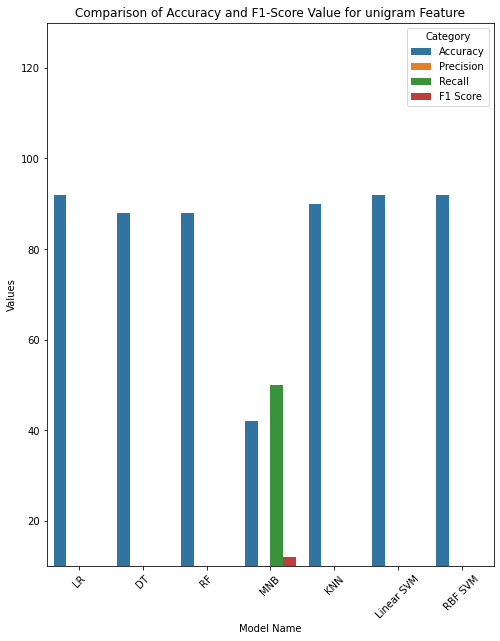

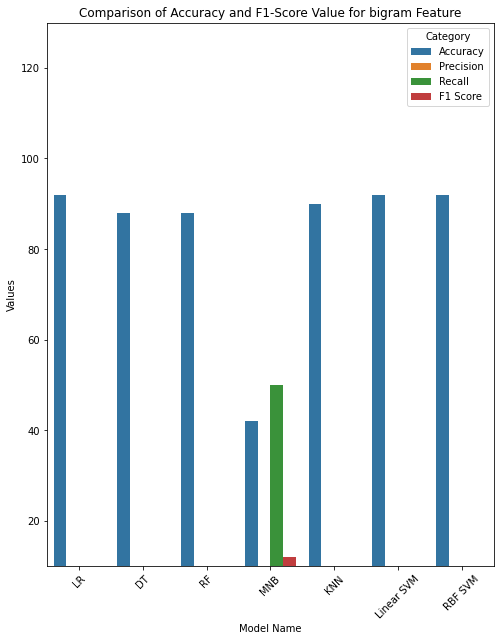

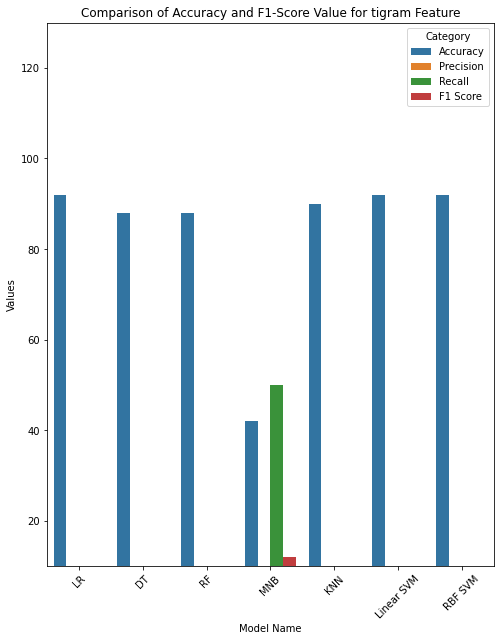

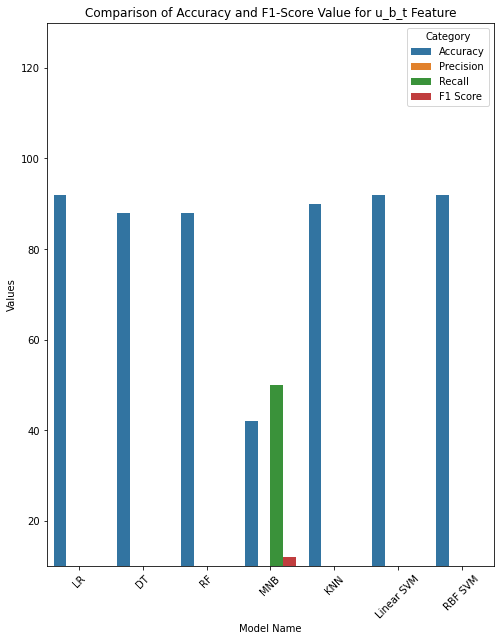

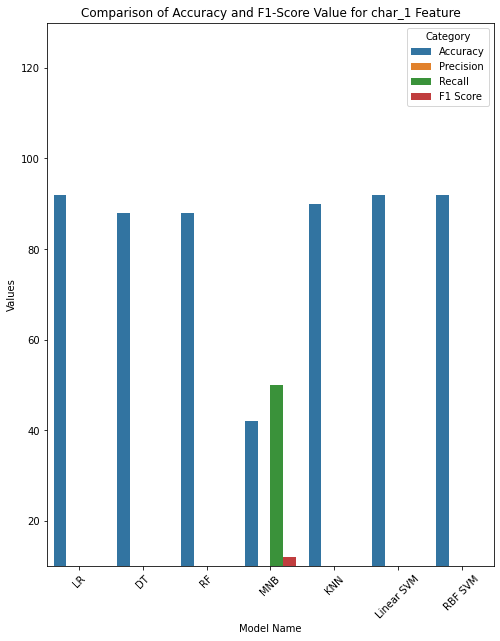

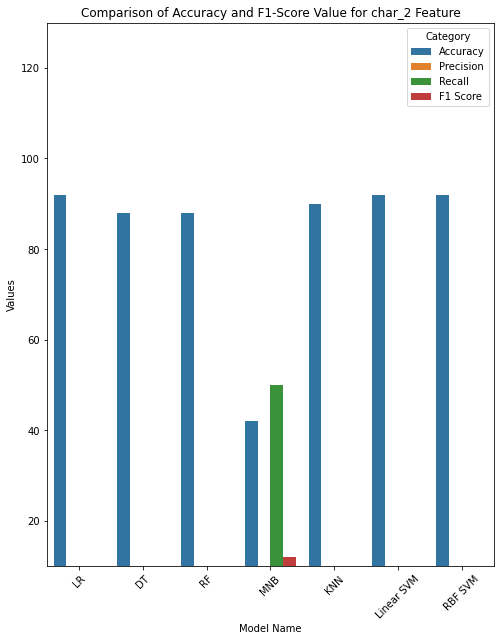

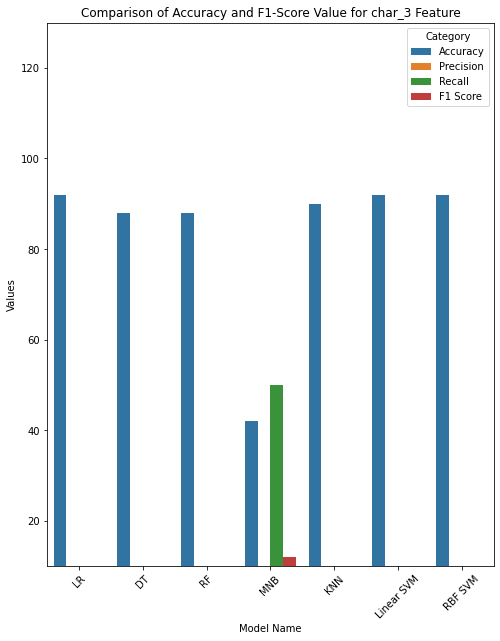

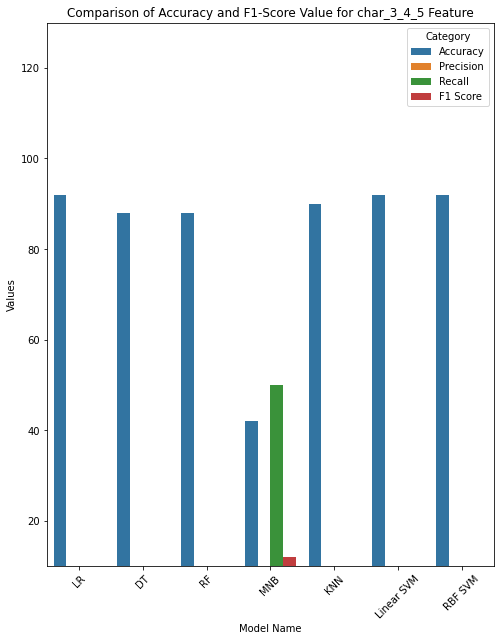

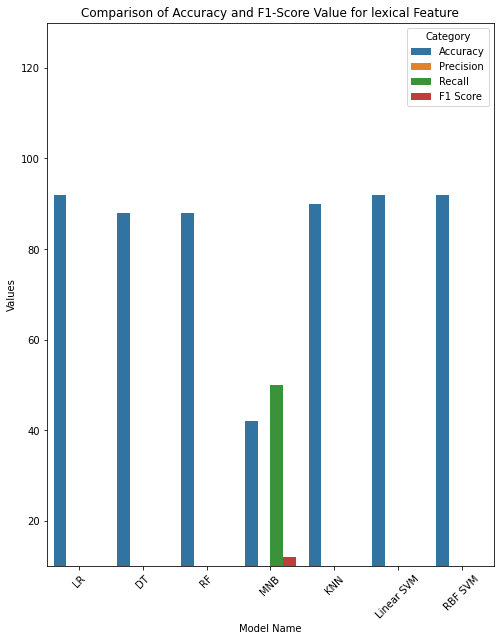

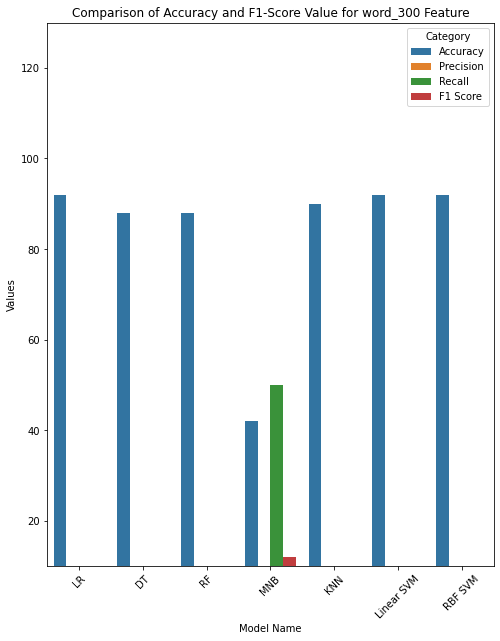

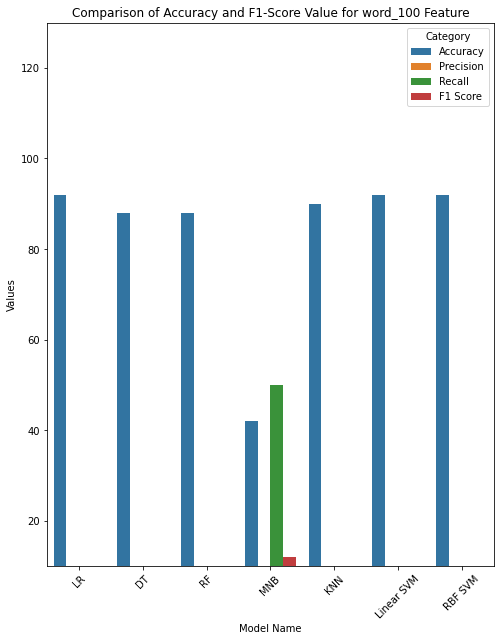

In [ ]:
feature_names=['unigram','bigram','tigram','u_b_t','char_1','char_2','char_3','char_3_4_5','lexical','word_300','word_100']

for gram in feature_names:
  #accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  accuracy = pd.read_json(f+"_results.json")
  df = pd.melt(accuracy, id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,10))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,130]) # Accuracy Deprnd to 100% compare every model
  ax.xaxis.set_ticklabels(accuracy['Model Name'], rotation=45);
  # print(df)